<a href="https://colab.research.google.com/github/JuanCReyes1/Neurocomputing/blob/master/IntegrateandFireNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The number of peaks for J= 5.0 is 0
The number of peaks for J= 5.1 is 0
The number of peaks for J= 5.199999999999999 is 0
The number of peaks for J= 5.299999999999999 is 0
The number of peaks for J= 5.399999999999999 is 0
The number of peaks for J= 5.499999999999998 is 0
The number of peaks for J= 5.599999999999998 is 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



The number of peaks for J= 5.6999999999999975 is 0
The number of peaks for J= 5.799999999999997 is 0
The number of peaks for J= 5.899999999999997 is 0
The number of peaks for J= 5.9999999999999964 is 0
The number of peaks for J= 6.099999999999996 is 0
The number of peaks for J= 6.199999999999996 is 0
The number of peaks for J= 6.299999999999995 is 0
The number of peaks for J= 6.399999999999995 is 0
The number of peaks for J= 6.499999999999995 is 0
The number of peaks for J= 6.599999999999994 is 0
The number of peaks for J= 6.699999999999994 is 0
The number of peaks for J= 6.799999999999994 is 0
The number of peaks for J= 6.899999999999993 is 0
The number of peaks for J= 6.999999999999993 is 0
The number of peaks for J= 7.0999999999999925 is 0
The number of peaks for J= 7.199999999999992 is 0
The number of peaks for J= 7.299999999999992 is 0
The number of peaks for J= 7.3999999999999915 is 0
The number of peaks for J= 7.499999999999991 is 0
The number of peaks for J= 7.599999999999991 

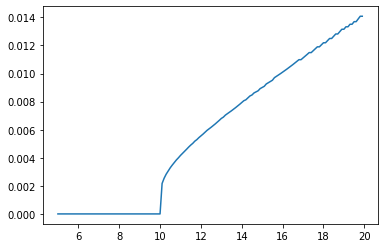

In [0]:
# Simulation of (leaky) integrate-and-fire neuron
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# parameters of the model
dt=0.1       # integration time step [ms]
tau=10       # time constant [ms]
E_L=-65      # resting potential [mV]
theta=-55    # firing threshold [mV]
RI_ext=14   # constant external input [mA/Ohm]

ext_current_range = np.arange(5,20,0.1)

f=[] #list that will store our frequency values

for J in ext_current_range:
    # Integration with Euler method
    v_rec=np.array([])
    t_rec=np.array([])
    s_rec=np.array([])
    t_step=0; 
    v=E_L;
    for t in range(int(100/dt)):
        s=v>theta
        #v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)-RI_ext)) #incorporates the reset 
        v=s*E_L+(1-s)*(v-dt/tau*((v-E_L)- J )) #incorporates the reset 
        v_rec=np.append(v_rec,v)
        t_rec=np.append(t_rec,t)
        s_rec=np.append(s_rec,s)
        
    peaks_locations = find_peaks(v_rec,-56)
    print("The number of peaks for J= " +str(J) +" is " + str(len(peaks_locations[0])))
    tdiff =[]
    
    #store frequencies for value of J
    for i in range(0,len(peaks_locations[0])-1):
        tdiff.append((peaks_locations[0][i+1]-peaks_locations[0][i]))
    tdiff=np.array(tdiff)
    f.append(1/(tdiff.mean()))
        
f=np.array(f)
f[np.isnan(f)]=0
#f

plt.plot(ext_current_range,f)
    

In [0]:
ext_current_range

array([ 5.  ,  5.01,  5.02, ..., 39.97, 39.98, 39.99])

In [0]:
f[np.isnan(f)]=0
f

array([0.        , 0.        , 0.        , ..., 0.03333333, 0.03333333,
       0.03333333])

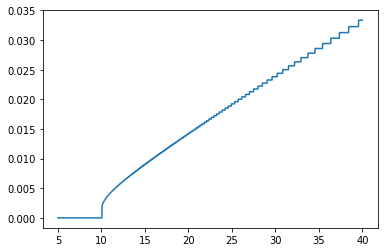

In [0]:
plt.plot(ext_current_range,f)